## 6.5 Unsupervised Machine Learning: Clustering

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering
#### 4. Clusters visualizations
#### 5. Descriptive statistics of the clusters 

### 1. Importing Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans     # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl                     # PyLab is a convenience module that bulk imports matplotlib.

from mpl_toolkits.mplot3d import Axes3D

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define a path

folder_path = r'F:\CF\6. Advanced Analytics\Brazilian E-Commerce'

In [5]:
# Import data

df_orders = pd.read_pickle(os.path.join(folder_path, '02 Data', 'Prepared Data', 'orders_checked.pkl') )

df_items = pd.read_pickle(os.path.join(folder_path, '02 Data', 'Prepared Data', 'items_checked.pkl') )

df_products = pd.read_pickle(os.path.join(folder_path, '02 Data', 'Prepared Data', 'products_checked.pkl') )

In [6]:
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                           category
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_status_grouped                     object
dtype: object

In [7]:
# merge again with products

df_products_items = df_products.merge(df_items, on="product_id")

In [8]:
# merge again with products

df_merged = df_products_items.merge(df_orders, on="order_id")

In [9]:
df_merged.shape

(111024, 25)

In [10]:
df_merged.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_length  product_description_length  product_photos_count  \
0                   40                         287                     1   
1                   44                         276                     1   
2                   46                         250                     1   
3                   27                         261                     1   
4                   37                         402                     4   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0               30.0               18.0              20.0   
2             154.0               18.0                9.0              15.0   
3             371.0               26.0                4.0              26.0   
4             625.0               20.0               17.0              13.0   

        category_name  ...   price shipping_cost  \
0           perfumery  ...   10.91          7.39   
1                 art  ...  248.00         17.99   
2  sports_and_leisure  ...   79.80          7.82   
3                baby  ...  112.30          9.54   
4          home_goods  ...   37.90          8.29   

                        customer_id order_status order_purchase_timestamp  \
0  f8a3e963a310aa58b60a5b1fed5bceb5    delivered      2018-04-24 16:16:53   
1  03fc97548af8f58fefc768d12b546c9c    delivered      2018-01-31 18:55:36   
2  e41819d1c95c12c9ce495b630eab8aee    delivered      2018-07-09 21:18:01   
3  322162b5ca010c2b059cb5224dd818b1    delivered      2018-08-03 08:55:50   
4  c11c31965ff02cc1d7132df8edfcbc22    delivered      2018-04-11 01:06:37   

    order_approved_at  order_delivered_carrier_date  \
0 2018-04-24 19:04:19           2018-04-25 17:01:00   
1 2018-01-31 19:11:15           2018-02-05 22:44:47   
2 2018-07-09 21:30:20           2018-07-10 11:49:00   
3 2018-08-03 09:31:42           2018-08-03 11:48:00   
4 2018-04-11 01:30:23           2018-04-12 22:56:27   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2018-04-27 16:42:17                    2018-05-09   
1           2018-02-16 13:27:08                    2018-02-22   
2           2018-07-11 23:24:16                    2018-07-18   
3           2018-08-06 15:14:32                    2018-08-08   
4           2018-04-13 22:41:44                    2018-04-26   

  order_status_grouped  
0            completed  
1            completed  
2            completed  
3            completed  
4            completed  

[5 rows x 25 columns]

In [11]:
# Create a new column that shows the time of delivery

df_merged['delivery_time'] = df_merged ['order_estimated_delivery_date'] - df_merged ['order_purchase_timestamp']

In [12]:
# Create a new column 'delivery_time_days' that stores the number of days from the 'delivery_time' column.  
# Since 'delivery_time' is a timedelta, using .dt.days extracts only the day value as an integer

df_merged["delivery_time_days"] = df_merged["delivery_time"].dt.days

In [13]:
# Create a new column that calculates size of each product

df_merged['product_size'] = df_merged ['product_length_cm'] * df_merged ['product_height_cm'] * df_merged ['product_width_cm']

In [14]:
df_merged.dtypes

product_id                                object
product_category_name                     object
product_name_length                        Int32
product_description_length                 Int32
product_photos_count                       Int32
product_weight_g                         float64
product_length_cm                        float64
product_height_cm                        float64
product_width_cm                         float64
category_name                             object
category_name_grouped                     object
order_id                                  object
order_item_id                     string[python]
seller_id                         string[python]
shipping_deadline                 datetime64[ns]
price                                    float64
shipping_cost                            float64
customer_id                               object
order_status                            category
order_purchase_timestamp          datetime64[ns]
order_approved_at   

In [15]:
# Check for missing values

df_merged.isnull().sum()

product_id                          0
product_category_name               0
product_name_length                 0
product_description_length          0
product_photos_count                0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
category_name                       0
category_name_grouped               0
order_id                            0
order_item_id                       0
seller_id                           0
shipping_deadline                   0
price                               0
shipping_cost                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1155
order_delivered_customer_date    2380
order_estimated_delivery_date       0
order_status_grouped                0
delivery_time                       0
delivery_tim

Two datetime columns have missing values, however, they are not involved in this analysis.

In [16]:
# Duplicates check

dups = df_merged.duplicated()

dups.shape

(111024,)

In [17]:
# Create a subset of the numerical columns we want to work on

df_subset = df_merged[[ 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_size', 
                        'price', 'shipping_cost'  , 'delivery_time_days']]

In [18]:
df_subset.head()

product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0               30.0               18.0              20.0   
2             154.0               18.0                9.0              15.0   
3             371.0               26.0                4.0              26.0   
4             625.0               20.0               17.0              13.0   

   product_size   price  shipping_cost  delivery_time_days  
0        2240.0   10.91           7.39                  14  
1       10800.0  248.00          17.99                  21  
2        2430.0   79.80           7.82                   8  
3        2704.0  112.30           9.54                   4  
4        4420.0   37.90           8.29                  14

### 2. The elbow technique

In [19]:
# Defines the range of potential clusters in the data. here 1,2,3, ... , 9.
num_cl = range(1, 10) 

kmeans = [KMeans(n_clusters=i) for i in num_cl]         # Defines k-means clusters in the range assigned above.

In [20]:
# Creates a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(df_subset).score(df_subset) for i in range(len(kmeans))]

In [21]:
# Show scores

score

[-62612323700520.01,
 -24258354531635.438,
 -12809720053197.781,
 -7874144266908.684,
 -5261151106590.479,
 -3845398516167.3096,
 -2996847611834.1426,
 -2346517650427.678,
 -1935464323763.068]

In [22]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  Based on the **Elbow Curve** chart, a reasonable choice for the number of clusters would be **3**.

The elbow method helps us find the optimal number of clusters by looking for the "elbow" point, where adding more clusters no longer significantly decreases the variance (or score) within the clusters.

Looking at the curve, we can see a steep drop in the score from 1 to 2 clusters, and a slightly less steep but still significant drop from 2 to 3 clusters. After 3, the curve starts to flatten out considerably. This indicates that the benefit of adding a fourth cluster is much smaller compared to the gain from moving from two to three clusters.

Therefore, **3** is the optimal number of clusters for this dataset. It provides a good balance between having enough groups to capture meaningful patterns and avoiding excessive complexity that doesn't add much value.

### 3. k-means clustering

In [23]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [24]:
# Fit the k-means object to the data.

kmeans.fit(df_subset)

KMeans(n_clusters=3)

In [25]:
# make a safe copy
df_subset = df_subset.copy()

# Running the K-Means clustering algorithm on the data in df_subset. It assigns each row to a cluster (e.g., 0, 1, 2, …)

df_subset["clusters"] = kmeans.fit_predict(df_subset)

In [26]:
df_subset.head()

product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0               30.0               18.0              20.0   
2             154.0               18.0                9.0              15.0   
3             371.0               26.0                4.0              26.0   
4             625.0               20.0               17.0              13.0   

   product_size   price  shipping_cost  delivery_time_days  clusters  
0        2240.0   10.91           7.39                  14         0  
1       10800.0  248.00          17.99                  21         0  
2        2430.0   79.80           7.82                   8         0  
3        2704.0  112.30           9.54                   4         0  
4        4420.0   37.90           8.29                  14         0

In [27]:
# Show the clusters and their counts

df_subset['clusters'].value_counts()

clusters
0    91689
2    16770
1     2565
Name: count, dtype: int64

In [28]:
# Exporting df_subset as “Brazilian_dataset.csv” in the “Prepared Data” folder

df_subset.to_csv(os.path.join(folder_path, '02 Data', 'Prepared Data', 'Brazilian_dataset.csv'))

### 4. Clusters Visualizations

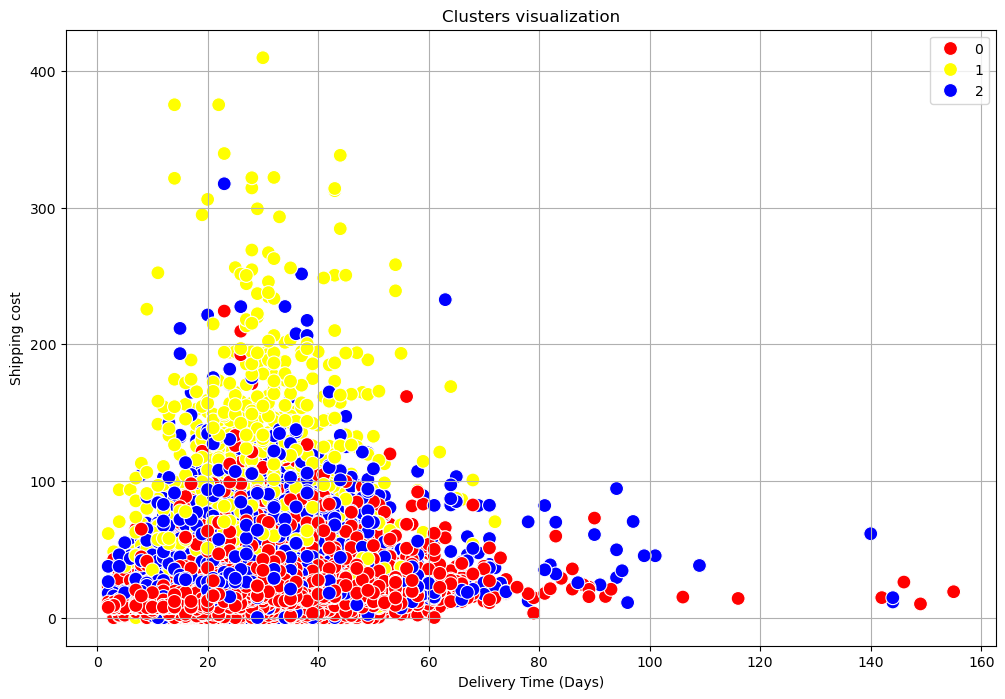

In [29]:
# Plot the clusters for the "delivery time (days)" and "shipping cost" variables.

plt.figure(figsize=(12,8))
colors = ["red", "yellow", "blue"]

ax = sns.scatterplot (
    x=df_subset["delivery_time_days"],
    y=df_subset["shipping_cost"],
    hue=kmeans.labels_,
    palette=colors,
    s=100 )
ax.grid(True) 
plt.xlabel("Delivery Time (Days)") 
plt.ylabel("Shipping cost") 
plt.title("Clusters visualization")
plt.show()

### Cluster Discussion

This scatter plot shows three clusters based on **Delivery Time (days)** and **Shipping Cost**. The clustering makes some sense but also shows limitations.

#### Why the Clusters Make Sense

* **Cluster 1 (Yellow – Low Cost):** Very cheap shipping, usually under \$50. Represents economy/standard shipping.
* **Cluster 2 (Blue – High Cost):** Expensive shipping (often >\$75), generally faster delivery. Matches premium or heavy/bulky items.
* **Cluster 0 (Red – Mixed):** Mid-range costs with a wide spread of delivery times, including very long delays. Likely a “catch-all” group for irregular or complex orders.

#### Limitations

1. **Overlap:** Red and blue clusters overlap in the \$50–\$150, 20–60 day range, making assignments unclear.
2. **Poor Definition of Red:** Cluster 0 is vague and less actionable.
3. **Cluster Shape:** K-means assumes spherical clusters, but these groups are irregular.

#### Next Steps

* Add more features (e.g., product weight, distance, category) to improve separation.

---

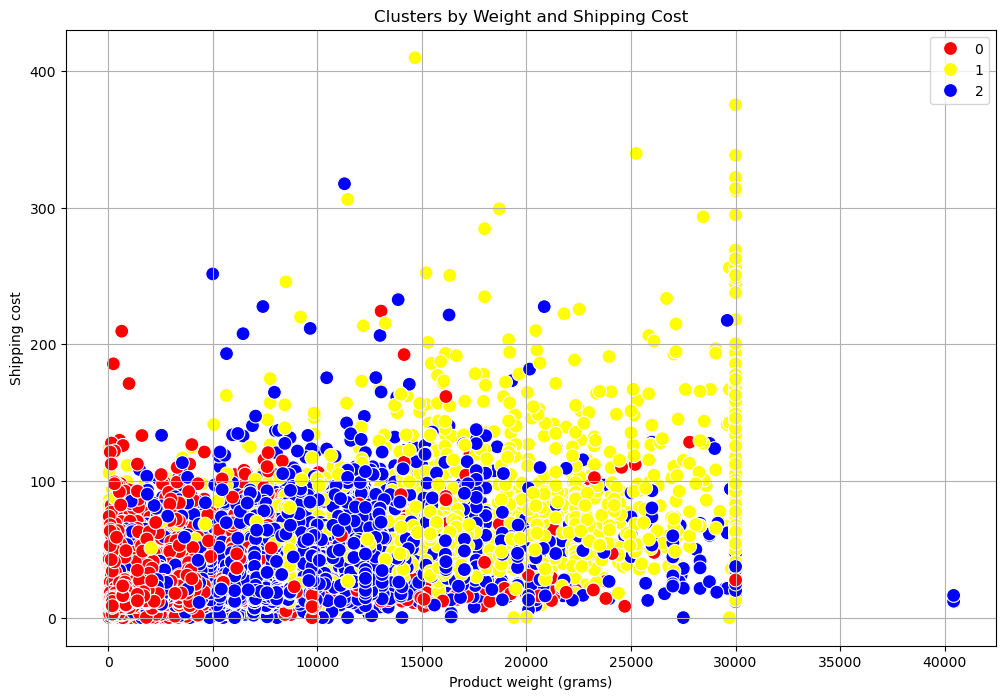

In [30]:
# Plot the clusters for the "shipping cost" and "product weight" variables.

plt.figure(figsize=(12,8))

# define a custom palette with 3 distinct colors
colors = ["red", "yellow", "blue"]

ax = sns.scatterplot(
    x=df_subset["product_weight_g"],
    y=df_subset["shipping_cost"],
    hue=kmeans.labels_,
    palette=colors,
    s=100 )
ax.grid(True)  # True -> show grid , False -> remove the grid
plt.xlabel("Product weight (grams)")  # Label x-axis
plt.ylabel("Shipping cost")           # Label y-axis
plt.title("Clusters by Weight and Shipping Cost")  # Add a title
plt.show()

### Cluster Discussion

This plot (Product Weight vs. Shipping Cost) is more meaningful because it clearly shows how **weight drives shipping cost**.

* **Cluster 1 (Yellow – Lightweight):** Mostly items under \~12kg. Represents small/medium parcels with cheaper shipping.
* **Cluster 2 (Blue – Heavyweight):** Mostly items above \~15kg, with many at exactly 30kg (likely a shipping cap or rule). Represents bulky/heavy goods.
* **Cluster 0 (Red – Mixed):** A scattered “catch-all” cluster with no clear identity, overlapping both light and heavy groups.

### Do the clusters make sense?

The clustering is **partially reasonable**:
- It reflects the natural relationship: **heavier products → higher shipping cost**.  
- The algorithm has identified groups that match intuitive categories: light items, standard products, and heavy items.  

### Limitations

* Red cluster is poorly defined and unhelpful.
* Shipping cost differences within clusters are ignored (e.g., two 30kg items with very different costs).
* The vertical line at 30kg suggests a data anomaly or carrier weight limit.

### Conclusion

The clusters make *some sense* but also show that shipping cost is influenced by more than just weight, so further exploration is needed.

---

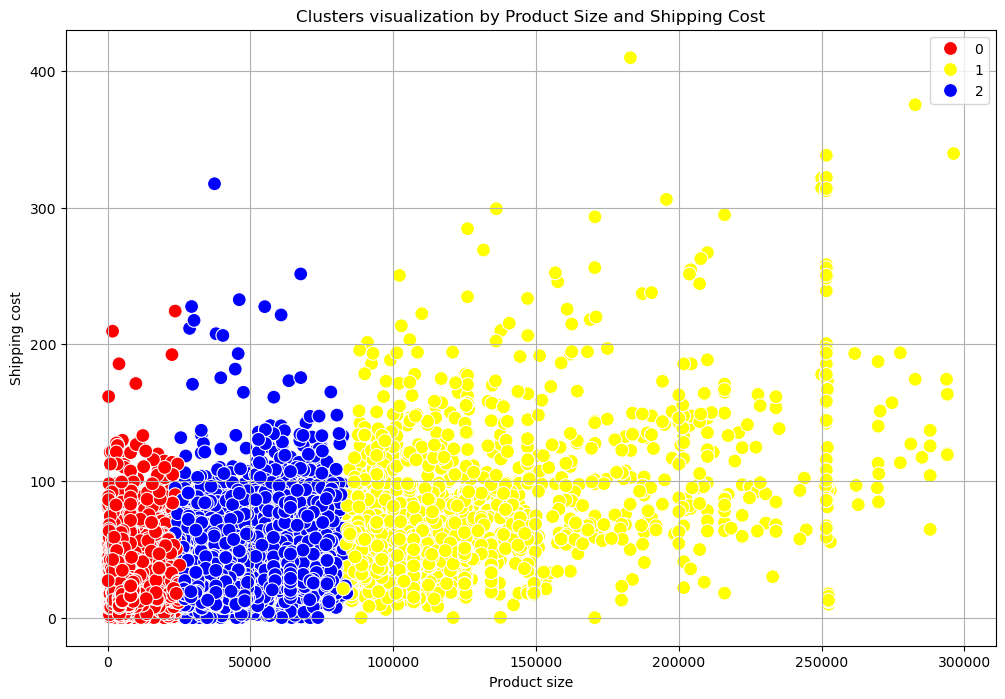

In [31]:
# Plot the clusters for the "product size" and "shipping cost" variables.

plt.figure(figsize=(12,8))

colors = ["red", "yellow", "blue"]

ax = sns.scatterplot (
    x=df_subset["product_size"],
    y=df_subset["shipping_cost"],
    hue=kmeans.labels_,
    palette=colors,
    s=100 )
ax.grid(True) 
plt.xlabel("Product size") 
plt.ylabel("Shipping cost") 
plt.title("Clusters visualization by Product Size and Shipping Cost")
plt.show()

### Interpreting the Clusters

The plot of **Product Size vs. Shipping Cost** shows the clearest and most meaningful segmentation so far:

* **Cluster 1 (Yellow – Small):** Small-sized products (below \~25,000 units) with relatively low shipping costs. Compact items that are inexpensive to ship.
* **Cluster 0 (Red – Medium):** Medium-sized products (\~25,000–80,000 units), generally with moderate shipping costs. Represents the bulk of standard products.
* **Cluster 2 (Blue – Large):** Large-sized products (above \~80,000 units) with shipping costs ranging from low to very high. These align with oversized or freight items, though variation exists due to other factors like distance or courier pricing.

The separation along the **x-axis (size)** is strong and intuitive: small, medium, and large product groups. Shipping cost generally increases with product size, though not in a perfectly linear way.


### Do the Clusters Make Sense?

Yes — this segmentation is more interpretable than clustering with weight alone:

* The clusters are **well-separated** with minimal overlap.
* They match **practical logistics categories** (small, medium, large parcels).
* However, wide variation in shipping costs within each size group shows that cost depends on **more than just size** (e.g., weight, distance, courier policies).


### Conclusion & Next Steps

This result confirms that **product size is the strongest predictor of shipping cost**, giving a simple and useful baseline segmentation. However, it is also mostly **one-dimensional**, since shipping cost was largely ignored within each size group. Combining **size and weight** together may improve the clustering results, since both affect shipping costs.

---

### 4. Descriptive Statistics of the Clusters 

In [32]:
df_subset.loc[df_subset['clusters'] == 2, 'cluster'] = 'blue'
df_subset.loc[df_subset['clusters'] == 1, 'cluster'] = 'yellow'
df_subset.loc[df_subset['clusters'] == 0, 'cluster'] = 'red'

In [33]:
df_subset.groupby('cluster').agg({'product_weight_g':['mean', 'median'], 
                         'product_size':['mean', 'median'], 
                          'shipping_cost':['mean', 'median'],
                          'delivery_time_days':['mean', 'median']})

product_weight_g            product_size           shipping_cost  \
                    mean   median           mean    median          mean   
cluster                                                                    
blue         5822.922004   5250.0   43098.200000   38700.0     27.205320   
red          1023.899617    500.0    7183.177513    4800.0     17.325059   
yellow      16223.759844  16100.0  123361.919298  106856.0     69.620211   

               delivery_time_days         
        median               mean median  
cluster                                   
blue     20.99          24.677579   24.0  
red      15.58          23.202598   23.0  
yellow   58.00          25.286160   24.0

### **Cluster-Level Insights**

#### **Cluster 2 (Blue – Large/Heavy Products)**

* **Weight:** Mean ≈ 16,224 g (median ≈ 16,100 g) → clearly the **heaviest items**.
* **Size:** Mean ≈ 123,362 (median ≈ 106,856) → these are also the **largest products by volume**.
* **Shipping Cost:** Mean ≈ 69.6, median ≈ 58 → **shipping is much more expensive**, as expected.
* **Delivery Time:** Mean ≈ 25.3 days, median = 24 → delivery takes slightly longer compared to other clusters.

**Interpretation:** Blue cluster corresponds to **large, heavy, and expensive-to-ship products**. These items may require special handling or freight shipping.

---

#### **Cluster 0 (Red – Medium Products)**

* **Weight:** Mean ≈ 5,823 g (median ≈ 5,250 g) → **moderately heavy items**.
* **Size:** Mean ≈ 43,098 (median ≈ 38,700) → **medium-sized products**.
* **Shipping Cost:** Mean ≈ 27.2, median ≈ 21 → **moderate shipping cost**.
* **Delivery Time:** Mean ≈ 24.7 days, median = 24 → delivery time is similar to blue cluster, but slightly faster.

**Interpretation:** Red cluster captures **standard products** with middle-range size, weight, and shipping cost. This is the bulk of everyday items.

---

#### **Cluster 1 (Yellow – Small/Light Products)**

* **Weight:** Mean ≈ 1,024 g (median = 500 g) → by far the **lightest products**.
* **Size:** Mean ≈ 7,183 (median = 4,800) → **very small in volume**.
* **Shipping Cost:** Mean ≈ 17.3, median ≈ 15.6 → **cheapest shipping**.
* **Delivery Time:** Mean ≈ 23.2 days, median = 23 → shipping time is **slightly shorter** than other clusters.

**Interpretation:** Yellow cluster contains **small, lightweight, and cheap-to-ship items**, typically delivered the fastest.

---

### **Cross-Cluster Comparison**

* **Product Weight & Size:** The three clusters form a clear progression:
  Yellow (small/light) → Red (medium) → Blue (large/heavy).
* **Shipping Cost:** Strongly correlated with both weight and size:
  Yellow (low) → Red (moderate) → Blue (high).
* **Delivery Time:** Differences are less pronounced. All clusters have median delivery times around 23–24 days, but larger products (blue) tend to take slightly longer on average.
* **Mean vs. Median:** In all clusters, the **mean is greater than the median**, especially for shipping cost and size in the blue cluster. This suggests **skewed distributions** — a few very large/heavy products or very expensive shipping cases are pulling the averages up.

---

### **Conclusion**

The descriptive statistics confirm that the clustering has worked well:

* **Yellow = small/light, low shipping cost, fast delivery**
* **Red = medium products, moderate shipping cost, standard delivery**
* **Blue = large/heavy, expensive to ship, slightly longer delivery**

This validates the clustering model’s ability to separate products into **practical logistics categories**. The main caveat is that **delivery time doesn’t vary much across clusters**, so it may not be a strong differentiator in this dataset.

---

### How the Descriptive Statistics Can Be Used in the Analytics Pipeline

The descriptive stats for the three clusters (yellow, red, blue) provide **practical insights** that can shape the next steps in analysis and decision-making.

#### 1. **Understanding Product Categories**

* The numbers confirm that the clusters capture **distinct product groups**:

  * **Yellow:** Very small/light products with the lowest costs and fastest delivery.
  * **Red:** Medium-sized and mid-weight items with moderate costs.
  * **Blue:** Heavy and very large products with high costs and slightly longer delivery times.
* These categories are valuable because they align with **real-world logistics groups** (small parcels, standard parcels, and heavy freight).

#### 2. **Identifying Outliers and Special Cases**

* The **blue cluster** shows extremely large values for weight and size.
* These cases can be flagged for **manual checks**, since they may require special handling, different shipping methods, or even represent **data entry errors**.

#### 3. **Operational and Business Improvements**

* **Logistics planning:** Warehouses can allocate storage space by cluster size categories.
* **Packaging optimization:** Companies can standardize packaging sizes (small, medium, large) based on cluster ranges.
* **Pricing strategies:** Shipping fees can be adjusted to better reflect the true costs of each cluster, ensuring profitability for heavier items.

---